In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import quandl as ql
from alpha_vantage.timeseries import TimeSeries
ql.ApiConfig.api_key = 'TvM-Jbzx938zxdKHUgxw'
alphaKey = 'QG9CR54Q5A0NVUV0'


## Testing API

In [3]:
#set up for alpha vantage api
ts = TimeSeries(alphaKey,output_format = 'pandas')

#testing for api
poly, meta = ts.get_daily(symbol='III.L', outputsize = 'full')

appledf = pd.DataFrame.from_dict(poly)
appledf.append(dict(zip(appledf.columns, appledf.columns)), ignore_index=True)
appledf.head()

ValueError: Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_DAILY.

In [3]:
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
appledf['4. close'].plot()
plt.tight_layout()
plt.grid()
plt.show()

NameError: name 'appledf' is not defined

<Figure size 1200x480 with 0 Axes>

## Stock data function

In [4]:
#pulling stock data for a stock 'name'
def importStockData(name):
    ts = TimeSeries(alphaKey,output_format = 'pandas')
    
    #pulls all availabe stock data as a pandas df
    stock, meta = ts.get_daily(symbol=name, outputsize = 'full')
    
    stock = stock.rename(columns={'1. open': "Open", '2. high': "High",'3. low':"Low",'4. close':"Close",'5. volume':"Volume",'date':'Date'})
    
    stock['Open'] = stock.Open.astype(float)
    stock['High'] = stock.High.astype(float)
    stock['Low'] = stock.Low.astype(float)
    stock['Close'] = stock.Close.astype(float)
    stock['Volume'] = stock.Volume.astype(int)
    stock['Date'] = stock.index.values
    stock['Day'] = stock.Date.dt.dayofyear
    stock['Year'] = stock.Date.dt.year
    
    #outputs a df with stock data since 2017
    stock19 = stock[stock['Year'] > 2016]
    stock19 = stock19.iloc[::-1]
    stock19 = stock19.reset_index(drop=True)
    
    return stock19



In [5]:
POLY19 = importStockData('III.L')
POLY19.head()

ValueError: Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_DAILY.

# Palladium

In [15]:
#For pulling paladium data

plPrice = ql.get("JOHNMATT/PALL", start_date="2019-01-01", end_date="2019-12-31")

#To make palladium csv - in github
#plPrice.to_csv('plPrice17-19.csv')
plPrice

,Hong Kong 8:30,Hong Kong 14:00,London 09:00,New York 9:30
Date,,,,
2019-01-02,1277.0,1272.0,1267.0,1262.0
2019-01-03,1273.0,1273.0,1268.0,1262.0
2019-01-04,1275.0,1274.0,1275.0,1270.0
2019-01-07,1315.0,1319.0,1314.0,1302.0
2019-01-08,1315.0,1314.0,1315.0,1307.0
...,...,...,...,...
2019-12-24,1880.0,1889.0,1885.0,1876.0
2019-12-26,NaN,NaN,NaN,1898.0
2019-12-27,1916.0,1916.0,1917.0,1905.0


In [17]:
#adds date and day columns from index column
plPrice['Date'] = pd.to_datetime(plPrice.index.values.astype('M8[D]'))
plPrice['Day'] = plPrice['Date'].dt.dayofyear
plPrice.head()

,Hong Kong 8:30,Hong Kong 14:00,London 09:00,New York 9:30,Date,Day
Date,,,,,,
2019-01-02,1277.0,1272.0,1267.0,1262.0,2019-01-02,2
2019-01-03,1273.0,1273.0,1268.0,1262.0,2019-01-03,3
2019-01-04,1275.0,1274.0,1275.0,1270.0,2019-01-04,4
2019-01-07,1315.0,1319.0,1314.0,1302.0,2019-01-07,7
2019-01-08,1315.0,1314.0,1315.0,1307.0,2019-01-08,8


## FTSE100 stock names 2019

In [5]:
#Lists of stock names in FTSE100 for each quarter of 2019
FTSEQ4 = ['III','ABF','ADM','AAL','ANTO','AHT','AZN','AUTO','AVV','AV','BA','BARC','BDEV','BKG','BHP','BP','BATS','BLND','BT-A','BNZL','BRBY','CCL','CNA','CCH','CPG','CRH','CRDA','DCC','DGE','EVR','EXPN','FERG','FLTR','FRES','GSK','GLEN','HLMA','HL','HSBA','HIK','HSX','IMB','INF','IHG','IAG','ITRK','ITV','JD','JMAT','KGF','LAND','LGEN','LLOY','LSE','MNG','MGGT','MRO','MNDI','MRW','NG','NXT','NMC','OCDO','PSON','PSN','PHNX','POLY','PRU','RB','REL','RTO','RIO','RMV','RR','RBS','RDSA','RDSB','RSA','SGE','SBRY','SDR','SMT','SGRO','SVT','SN','SMDS','SMIN','SKG','SPX','SSE','STAN','SLA','STJ','TW','TSCO','TUI','ULVR','UU','VOD','WTB','WPP']
FTSEQ3 = ['III','ABF','ADM','AAL','ANTO','AHT','AZN','AUTO','AVV','AV','BA','BARC','BDEV','BKG','BHP','BP','BATS','BLND','BT-A','BNZL','BRBY','CCL','CNA','CCH','CPG','CRH','CRDA','DCC','DGE','DLG','EVR','EXPN','FERG','FLTR','FRES','GSK','GLEN','HLMA','HL','HSBA','HSX','IMB','INF','IHG','IAG','ITRK','ITV','JD','JMAT','KGF','LAND','LGEN','LLOY','LSE','MCRO','MKS','MNG','MRO','MNDI','MRW','NG','NXT','NMC','OCDO','PSON','PSN','PHNX','PRU','RB','REL','RTO','RIO','RMV','RR','RBS','RDSA','RDSB','RSA','SGE','SBRY','SDR','SMT','SGRO','SVT','SN','SMDS','SMIN','SKG','SPX','SSE','STAN','SLA','STJ','TW','TSCO','TUI','ULVR','UU','VOD','WTB','WPP']
FTSEQ2 = ['III','ABF','ADM','AAL','ANTO','AHT','AZN','AUTO','AV','BA','BARC','BDEV','BKG','BHP','BP','BATS','BLND','BT-A','BNZL','BRBY','CCL','CNA','CCH','CPG','CRH','CRDA','DCC','DGE','DLG','EVR','EZJ','EXPN','FERG','FLTR','FRES','GSK','GLEN','HIK','HLMA','HL','HSBA','HSX','IMB','INF','IHG','IAG','ITRK','ITV','JMAT','KGF','LAND','LGEN','LLOY','LSE','MCRO','MKS','MNG','MRO','MNDI','MRW','NG','NXT','NMC','OCDO','PSON','PSN','PHNX','PRU','RB','REL','RTO','RIO','RMV','RR','RBS','RDSA','RDSB','RSA','SGE','SBRY','SDR','SMT','SGRO','SVT','SN','SMDS','SMIN','SKG','SPX','SSE','STAN','SLA','STJ','TW','TSCO','TUI','ULVR','UU','VOD','WTB','WPP']
FTSEQ1 = ['III','ABF','ADM','AAL','ANTO','AHT','AZN','AUTO','AV','BA','BARC','BDEV','BKG','BHP','BP','BATS','BLND','BT-A','BNZL','BRBY','CCL','CNA','CCH','CPG','CRH','CRDA','DCC','DGE','DLG','EVR','EZJ','EXPN','FERG','FLTR','FRES','GSK','GLEN','GVC','HLMA','HL','HSBA','HSX','IMB','INF','IHG','IAG','ITRK','ITV','JMAT','KGF','LAND','LGEN','LLOY','LSE','MCRO','MKS','MNG','MRO','MNDI','MRW','NG','NXT','NMC','OCDO','PSON','PSN','PRU','RB','REL','RTO','RIO','RMV','RR','RBS','RDSA','RDSB','RSA','SGE','SBRY','SDR','SMT','SGRO','SVT','SN','SMDS','SMIN','SKG','SPX','SSE','STAN','SLA','STJ','TW','TSCO','TUI','ULVR','UU','VOD','WG','WTB','WPP']

#list of all stocks in FTSE100 over the year 
allStocks19 = list(np.unique(np.asarray(FTSEQ1+FTSEQ2+FTSEQ3+FTSEQ4)))

newStocks19 = list(set(allStocks19).difference(FTSEQ4))
newStocks19

allStocks19ForWS = allStocks19
allStocks19ForWS[6] = 'AV.L'
allStocks19ForWS[allStocks19ForWS.index('BA')] = 'BA.'
allStocks19ForWS[allStocks19ForWS.index('HL')] = 'HL.'
allStocks19ForWS[allStocks19ForWS.index('JD')] = 'JD.'
allStocks19ForWS[allStocks19ForWS.index('NG')] = 'NG.'
allStocks19ForWS[allStocks19ForWS.index('RB')] = 'RB.'
allStocks19ForWS[allStocks19ForWS.index('RR')] = 'RR.'
allStocks19ForWS[allStocks19ForWS.index('SN')] = 'SN.'
allStocks19ForWS[allStocks19ForWS.index('TW')] = 'TW.'
allStocks19ForWS[allStocks19ForWS.index('UU')] = 'UU.'
allStocks19ForWS[allStocks19ForWS.index('WG')] = 'WG.'
allStocks19ForWS

#allStocks19ForWS = ['CNA','CRDA','DLG','FLTR','HSBA','III','JMAT','KGF','SMT']
#allStocks19ForWS[29::]

['AAL',
 'ABF',
 'ADM',
 'AHT',
 'ANTO',
 'AUTO',
 'AV.L',
 'AVV',
 'AZN',
 'BA.',
 'BARC',
 'BATS',
 'BDEV',
 'BHP',
 'BKG',
 'BLND',
 'BNZL',
 'BP',
 'BRBY',
 'BT-A',
 'CCH',
 'CCL',
 'CNA',
 'CPG',
 'CRDA',
 'CRH',
 'DCC',
 'DGE',
 'DLG',
 'EVR',
 'EXPN',
 'EZJ',
 'FERG',
 'FLTR',
 'FRES',
 'GLEN',
 'GSK',
 'GVC',
 'HIK',
 'HL.',
 'HLMA',
 'HSBA',
 'HSX',
 'IAG',
 'IHG',
 'III',
 'IMB',
 'INF',
 'ITRK',
 'ITV',
 'JD.',
 'JMAT',
 'KGF',
 'LAND',
 'LGEN',
 'LLOY',
 'LSE',
 'MCRO',
 'MGGT',
 'MKS',
 'MNDI',
 'MNG',
 'MRO',
 'MRW',
 'NG.',
 'NMC',
 'NXT',
 'OCDO',
 'PHNX',
 'POLY',
 'PRU',
 'PSN',
 'PSON',
 'RB.',
 'RBS',
 'RDSA',
 'RDSB',
 'REL',
 'RIO',
 'RMV',
 'RR.',
 'RSA',
 'RTO',
 'SBRY',
 'SDR',
 'SGE',
 'SGRO',
 'SKG',
 'SLA',
 'SMDS',
 'SMIN',
 'SMT',
 'SN.',
 'SPX',
 'SSE',
 'STAN',
 'STJ',
 'SVT',
 'TSCO',
 'TUI',
 'TW.',
 'ULVR',
 'UU.',
 'VOD',
 'WG.',
 'WPP',
 'WTB']

In [266]:
#adds .L to stock name to change it to international stock code used by API
allStocks19 = ['{}.L'.format(a) for a in allStocks19]
#allStocks19

['AAL.L',
 'ABF.L',
 'ADM.L',
 'AHT.L',
 'ANTO.L',
 'AUTO.L',
 'AV.L',
 'AVV.L',
 'AZN.L',
 'BA.L',
 'BARC.L',
 'BATS.L',
 'BDEV.L',
 'BHP.L',
 'BKG.L',
 'BLND.L',
 'BNZL.L',
 'BP.L',
 'BRBY.L',
 'BT-A.L',
 'CCH.L',
 'CCL.L',
 'CNA.L',
 'CPG.L',
 'CRDA.L',
 'CRH.L',
 'DCC.L',
 'DGE.L',
 'DLG.L',
 'EVR.L',
 'EXPN.L',
 'EZJ.L',
 'FERG.L',
 'FLTR.L',
 'FRES.L',
 'GLEN.L',
 'GSK.L',
 'GVC.L',
 'HIK.L',
 'HL.L',
 'HLMA.L',
 'HSBA.L',
 'HSX.L',
 'IAG.L',
 'IHG.L',
 'III.L',
 'IMB.L',
 'INF.L',
 'ITRK.L',
 'ITV.L',
 'JD.L',
 'JMAT.L',
 'KGF.L',
 'LAND.L',
 'LGEN.L',
 'LLOY.L',
 'LSE.L',
 'MCRO.L',
 'MGGT.L',
 'MKS.L',
 'MNDI.L',
 'MNG.L',
 'MRO.L',
 'MRW.L',
 'NG.L',
 'NMC.L',
 'NXT.L',
 'OCDO.L',
 'PHNX.L',
 'POLY.L',
 'PRU.L',
 'PSN.L',
 'PSON.L',
 'RB.L',
 'RBS.L',
 'RDSA.L',
 'RDSB.L',
 'REL.L',
 'RIO.L',
 'RMV.L',
 'RR.L',
 'RSA.L',
 'RTO.L',
 'SBRY.L',
 'SDR.L',
 'SGE.L',
 'SGRO.L',
 'SKG.L',
 'SLA.L',
 'SMDS.L',
 'SMIN.L',
 'SMT.L',
 'SN.L',
 'SPX.L',
 'SSE.L',
 'STAN.L',
 'STJ.L',
 'S

In [13]:
#pulls stocks from list of names and exports them as CSVs - find all stocks (allStocks19) as CSVs on github
'''
for idx,stock in enumerate(newDifference):
    
    if idx > -1:
        print(stock)
        stockdf = importStockData(stock)
        stockdf.to_csv('{0}17-20.csv'.format(stock))
        sleep(12)
'''


"\nfor idx,stock in enumerate(newDifference):\n    \n    if idx > -1:\n        print(stock)\n        stockdf = importStockData(stock)\n        stockdf.to_csv('{0}17-20.csv'.format(stock))\n        sleep(12)\n"

In [20]:
stockdf = importStockData('III.L')
stockdf.to_csv('{0}17-20.csv'.format('III.L'))

ValueError: Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_DAILY.

# Graphing test

       Open    High     Low   Close   Volume       Date  Day  Year
505   828.0   843.8   809.6   843.6  1011305 2019-01-02    2  2019
506   840.0   864.2   831.2   863.8  2456502 2019-01-03    3  2019
507   868.0   877.2   854.8   856.8  2089074 2019-01-04    4  2019
508   867.2   869.6   858.0   866.4   984279 2019-01-07    7  2019
509   870.0   870.0   853.8   853.8  1163531 2019-01-08    8  2019
..      ...     ...     ...     ...      ...        ...  ...   ...
753  1159.5  1174.0  1157.0  1174.0  1069145 2019-12-23  357  2019
754  1174.0  1185.0  1165.0  1170.0   214122 2019-12-24  358  2019
755  1180.0  1196.5  1180.0  1189.5  1499641 2019-12-27  361  2019
756  1194.5  1199.5  1181.0  1193.0   726521 2019-12-30  364  2019
757  1175.0  1205.0  1175.0  1195.0   287677 2019-12-31  365  2019

[253 rows x 8 columns]


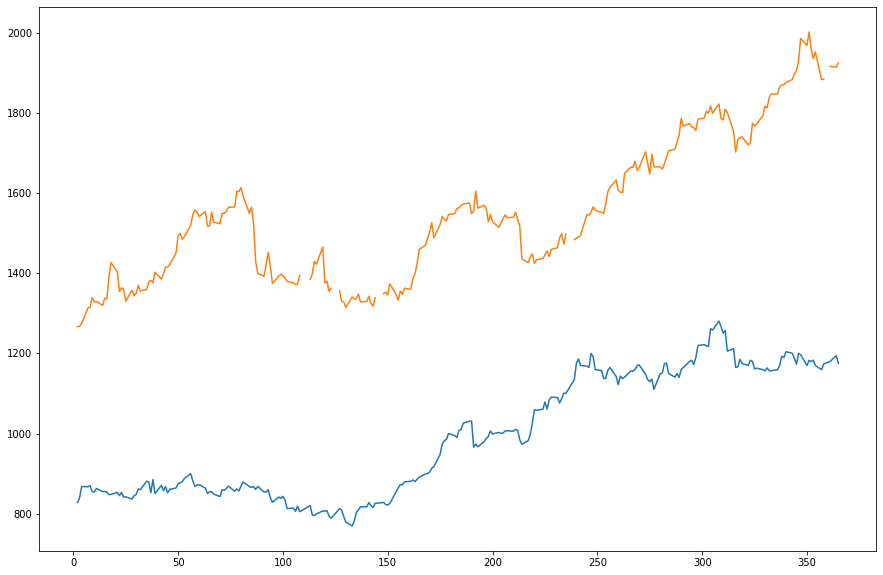

In [19]:
POLY19 = importStockData('POLY.L')
POLY19 = POLY19[POLY19['Year']==2019]
print(POLY19)
f = plt.figure(figsize=(15,10))
axs = f.add_subplot(111)
axs.plot(POLY19['Day'], POLY19['Open'])
axs.plot(plPrice['Day'],plPrice['London 09:00'])
plt.show()

# Web scraping for free float %

In [3]:
import cv2
import pytesseract
from PIL import Image
import argparse
import os
from wand.image import Image as wi
from wand.api import library

import io
import ctypes
from PyPDF2 import PdfFileReader, PdfFileWriter

library.MagickNextImage.argtypes = [ctypes.c_void_p]
library.MagickNextImage.restype = ctypes.c_int
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/Cellar/tesseract/4.1.1/bin/tesseract'

# Using OCR to extract text from PDFs

In [4]:
def extractDataFromPdf(pdflocation, name, date):
    
    reader = PdfFileReader(pdflocation,'r')
    writer = PdfFileWriter()
    numOfPages = reader.getNumPages()
    
    #select page with relevant info on it 
    if numOfPages == 3:
        page = reader.getPage(1)
    elif numOfPages == 4:
        page = reader.getPage(2)
    else:
        print(f'Number of pages is {numOfPages}')
        
    #crop to area on page where info is 
    page.cropBox.setLowerLeft((25,400))
    page.cropBox.setUpperLeft((25,480))
    page.cropBox.setLowerRight((190,400))
    page.cropBox.setUpperRight((190,480))
    writer.addPage(page)

    #save cropped PDF
    freeFloat = open(f'PDFs/{name}_{date}_cropped.pdf','wb')
    writer.write(freeFloat)
    freeFloat.close()

    #read cropped PDF
    pdfFile = wi(filename = f'PDFs/{name}_{date}_cropped.pdf', resolution = 150)
    image = pdfFile.convert('jpeg')

    #extract text from image using OCR
    imageBlobs = []

    for img in image.sequence:
        imgPage = wi(image = img)
        imageBlobs.append(imgPage.make_blob('jpeg'))

    extract = []

    for imgBlob in imageBlobs:
        image = Image.open(io.BytesIO(imgBlob))
        text = pytesseract.image_to_string(image, lang = 'eng')
        extract.append(text)

    return (extract)

In [22]:
print(extractDataFromPdfTest('PDFs/BARC_05-10-2017.pdf','test','test2'))

['Shares in Issue 17,030,191,601\nFree Float 16.97bn (99.6%)\n\nBARCQuote']


# Webscraping for relevant PDFs

In [5]:
import requests
import re
from datetime import datetime

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException

In [17]:
#finds 'closest' item to pivot in list - used for comparing dates
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

In [28]:
csvNumber = 40
#dates for which info is needed - cut-off dates for free-float and oustanding shares
FFCutOffDates = [datetime.strptime('Aug 16, 2019', '%b %d, %Y').date(), \
                         datetime.strptime('May 10, 2019', '%b %d, %Y').date(), \
                         datetime.strptime('Feb 8, 2019', '%b %d, %Y').date(), \
                         datetime.strptime('Nov 16, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Aug 17, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('May 17, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Feb 14, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Nov 15, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Aug 16, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('May 12, 2017', '%b %d, %Y').date()
                        ]
oustandingSharesDF = pd.DataFrame(index = FFCutOffDates)
freeFloatSharesDF = pd.DataFrame(index = FFCutOffDates)
freeFloatPercDF = pd.DataFrame(index = FFCutOffDates)
listOfMissedStocks = []

In [29]:
#launches chrome
driver = webdriver.Chrome('/Users/wxm/Documents/Programming/Python/bloombergMDM/chromedriver')
driver.get('https://app.stockopedia.com/home')

#XPATH for button that needs to be pressed
printButtonXPATH = '/html/body/stockopedia-app/ui-view/app/div/div/div/div/ui-view/stockreport/div/stockreport-header/div/div[2]/div/div[3]/div/div/div/historic-stockreports/context-menu/div/div'

ignored_exceptions=(NoSuchElementException,StaleElementReferenceException,)

#logs in
try:
    user = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.NAME, "username"))
    )
finally:
    user = driver.find_element_by_name("username")

user.clear()
user.send_keys('william.x.mower@gmail.com')

passw = driver.find_element_by_name("password")
passw.clear()
passw.send_keys('cinRaz-mivgun-jugqy8')
passw.send_keys(Keys.RETURN)

#iterates over all stocks for which data is needed
try:            
    for idx,stockToGet in enumerate(allStocks19ForWS):
        
        if idx < 1:
            print(idx,stockToGet)
            it = 0
            dateTest = datetime.strptime('Jan 1, 2020', '%b %d, %Y').date()
            
            #find search bar
            try:
                search = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.NAME, "searchQuery"))
                )
            except:
                search.send_keys(Keys.RETURN)
            finally:
                search = driver.find_element_by_name("searchQuery")
            
            #search and vaigate to stock page
            search.clear()
            search.send_keys("{0}".format(stockToGet))
            sleep(4)
            search.send_keys(Keys.RETURN)
            sleep(2)
            search.send_keys(Keys.RETURN)
            sleep(4)

            #click print button to access PDF list
            try:
                button = WebDriverWait(driver, 7,ignored_exceptions=ignored_exceptions).until(
                EC.presence_of_element_located((By.XPATH, printButtonXPATH)))
            except:
                search.send_keys(Keys.RETURN)
            finally:
                button = driver.find_element(By.XPATH, printButtonXPATH)    
            button.click()
            sleep(3)

            #tab to load full pdf list
            actions = webdriver.ActionChains(driver)
            actions.key_down(Keys.SHIFT)
            
            for i in range(30):
                actions.send_keys(Keys.TAB) 
                actions.pause(0.1)

            actions.key_up(Keys.SHIFT)

            for i in range(120):
                actions.send_keys(Keys.TAB) 
                actions.pause(0.15)

            actions.perform()
            sleep(2)
            
            #extract all items in PDFs list
            pdflinks = driver.find_elements_by_class_name('item.ng-star-inserted')
            dateTest = datetime.strptime(pdflinks[-1].text, '%b %d, %Y').date()
            it += 1
            
            #checks last date in list is earlier than the date we need
            if dateTest < FFCutOffDates[-1]:    
                
                #extract dates and web links for each pdf
                listOfAllReportDates = []
                listOfReportLinks = []

                for pdf in pdflinks:

                    try:
                        listOfAllReportDates.append(datetime.strptime(pdf.text, '%b %d, %Y').date())
                    except:
                        continue
                    else:
                        listOfReportLinks.append(pdf.get_attribute('href'))

                listOfShares = []
                listOfFreeFloats = []
                listOfFreeFloatsPercentages = []
                
                #iterates over each date in list of required dates
                for CODate in FFCutOffDates:
                    #finds closest date from list to date needed
                    closest = nearest(listOfAllReportDates, CODate)
                    
                    print(CODate,closest)
                    
                    #get the relevant link
                    link = listOfReportLinks[listOfAllReportDates.index(closest)]
                    PDF = requests.get(link)
                    
                    #download PDF from link
                    with open('PDFs/{0}_{1}.pdf'.format(stockToGet,closest.strftime("%m-%d-%Y")), 'wb') as f:
                        f.write(PDF.content)
                    
                    #crop and extract text from pdf
                    extractList = extractDataFromPdfTest('PDFs/{0}_{1}.pdf'.format(stockToGet,closest.strftime("%m-%d-%Y")),stockToGet,closest.strftime("%m-%d-%Y"))
                    print(extractList)
                    extract = extractList[0]
                    
                    #get outstanding shares
                    outstandingShares = re.search('[\d+,]+(\d,\d\d\d)', extract)
                    if outstandingShares:
                        outstandingShares = outstandingShares.group(0)
                        print('Number of outstanding shares for ',stockToGet,' is ',outstandingShares)
                        listOfShares.append(int(outstandingShares.replace(",", "")))

                    else:
                        print('Outstanding shares not found for ',stockToGet)
                        listOfShares.append(0)

                    #get free float shares
                    freeFloatShares = re.search('\d+[,.]\d+\w+(?= \((.+?)%\))', extract)
                    if freeFloatShares:
                        
                        freeFloatShares = freeFloatShares.group(0)
                        if freeFloatShares[-1] == 'n':
                            freeFloatSharesInt = float(freeFloatShares[0:-2].replace(",", ".")) * 1000000000
                            print(freeFloatShares,' --> ', freeFloatSharesInt)
                        elif freeFloatShares[-1] == 'm':
                            freeFloatSharesInt = float(freeFloatShares[0:-1].replace(",", ".")) * 1000000
                            print(freeFloatShares,' --> ', freeFloatSharesInt)
                        else:
                            print(freeFloatShares,' cannot be converted to float')
                            freeFloatSharesInt = 0

                        print('Number of free float shares for ',stockToGet,' is ',freeFloatSharesInt)
                        listOfFreeFloats.append(freeFloatSharesInt)

                    else:
                        print('Fre float shares not found for ',stockToGet)
                        listOfFreeFloats.append(None)
                    
                    #get free float percentage 
                    freeFloatSharesPerc = re.search('\((.+?)%\)', extract)
                    if freeFloatSharesPerc:
                        
                        freeFloatSharesPerc = float(freeFloatSharesPerc.group(1))/100
                        print('Free float percentage for ',stockToGet,' is ',freeFloatSharesPerc,'\n')
                        listOfFreeFloatsPercentages.append(freeFloatSharesPerc)

                    else:
                        print('Fre float percentage not found for ',stockToGet)
                        listOfFreeFloatsPercentages.append(None)

                oustandingSharesDF[stockToGet] = listOfShares
                freeFloatSharesDF[stockToGet] = listOfFreeFloats
                freeFloatPercDF[stockToGet] = listOfFreeFloatsPercentages
                
            else:
                driver.refresh()
                listOfMissedStocks.append(stockToGet)

            
finally:
    csvNumber += 1
    #write data to relevant csv
    oustandingSharesDF.to_csv(f'scrapedDataCSVs/outstandingShares{csvNumber}.csv')
    freeFloatSharesDF.to_csv(f'scrapedDataCSVs/freeFloatShares{csvNumber}.csv')
    freeFloatPercDF.to_csv(f'scrapedDataCSVs/freeFloatPerc{csvNumber}.csv')
    


0 BARC
2019-08-16 2019-08-19
['Shares in Issue 17,247,179,295,\nFree Float 17.17bn (99.6%)\n\nBARC Share Price Quote']
Number of outstanding shares for  BARC  is  17,247,179,295
17.17bn  -->  17170000000.000002
Number of free float shares for  BARC  is  17170000000.000002
Free float percentage for  BARC  is  0.996 

2019-05-10 2019-05-12
['Shares in Issue 17,240,956,167\nFree Float 17.17bn (99.6%)\n\nBARC Share Price Quote']
Number of outstanding shares for  BARC  is  17,240,956,167
17.17bn  -->  17170000000.000002
Number of free float shares for  BARC  is  17170000000.000002
Free float percentage for  BARC  is  0.996 

2019-02-08 2019-02-10
['Shares in Issue 17,134,457,673\nFree Float 17.05bn (99.5%)\n\nBARCQuote']
Number of outstanding shares for  BARC  is  17,134,457,673
17.05bn  -->  17050000000.0
Number of free float shares for  BARC  is  17050000000.0
Free float percentage for  BARC  is  0.995 

2018-11-16 2018-11-18
['Shares in Issue 17,128,392,319\nFree Float 17.05bn (99.5%)\n\

In [153]:
print(datetext)
date = datetime.strptime(datetext, '%b %d, %Y').date()
print(date)
#use all free float dates for number of outstanding shares too, 
#then use the share price on market cap dates to find market cap

#dates for 2019 - market cap
'''
4th dec 2018
26 feb 2019
4th june 19
3 sep 19
'''
#dates for 2018 - market cap
'''
28 nov 17
27 feb 18
29 may 18
4 sep 18
'''

#use all free float dates for number of outstanding shares too, then use the share price on market cap dates to find market cap
#dates for 2019 - free float
'''
16 nov 18
8 feb 19
10 may 19
16 aug 19
'''
#dates for 2018 - free float
'''
15 nov 17
14 feb 18
17 may 18
17 aug 18
'''


Feb 22, 2020
2020-02-22


'\n15 nov 17\n14 feb 18\n17 may 18\n17 aug 18\n'